<a href="https://colab.research.google.com/github/PengjunHou/CSE437-RL/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [9]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -2476
Episode 2: total reward = -991
Episode 3: total reward = -991
Episode 4: total reward = -496
Episode 5: total reward = -100


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [10]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 10000      # number of episodes to run
max_steps = 100     # safety cap

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))

print(f"n_states: {n_states}")
print(f"n_actions: {n_actions}")



n_states: 48
n_actions: 4


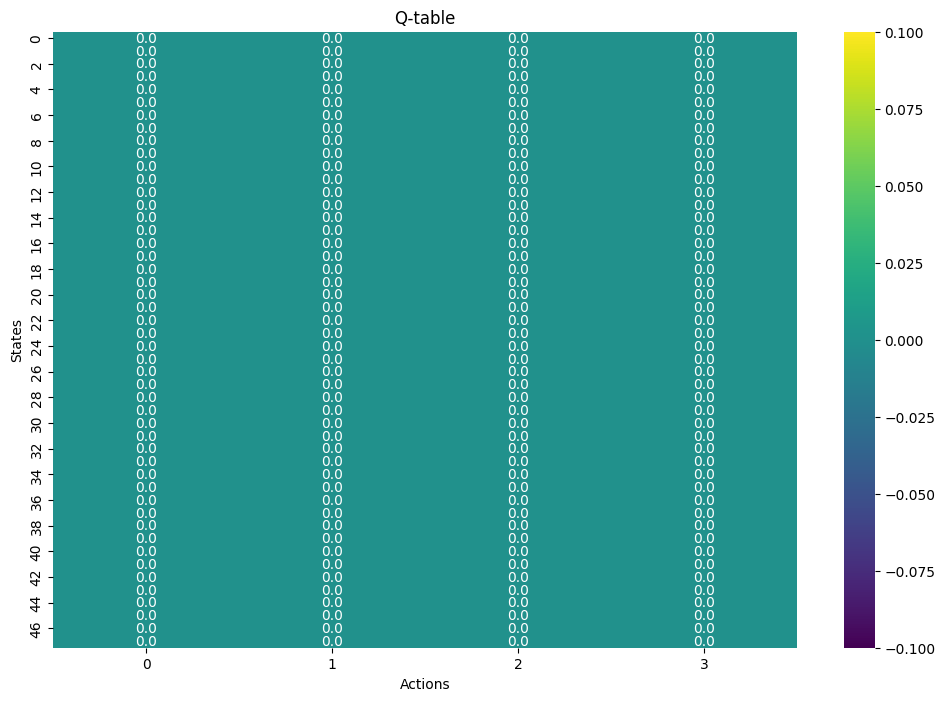

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

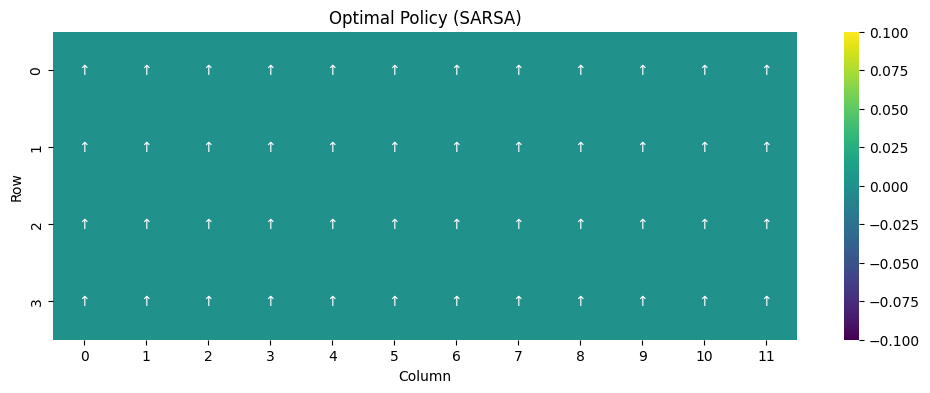

In [12]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title(f"Optimal Policy ({title})")
  plt.show()
plot_policy(Q)

In [13]:
# Greedy Policy
def Greedy_plocy(state, Q_table):
  action = np.argmax(Q_table[state], axis = 0)
  # print(f"Greedy Policy, state: {state}, action:{action}, Q value {Q_table[state]}")
  return action

# Epsilon_Greedy Policu
def Epsilon_greedy_policy(state, Q_table, epsilon = 0.1):
  rand_v = np.random.rand()
  if rand_v < epsilon:
    action = env.action_space.sample()
  else:
    action = Greedy_plocy(state, Q_table)
  return action


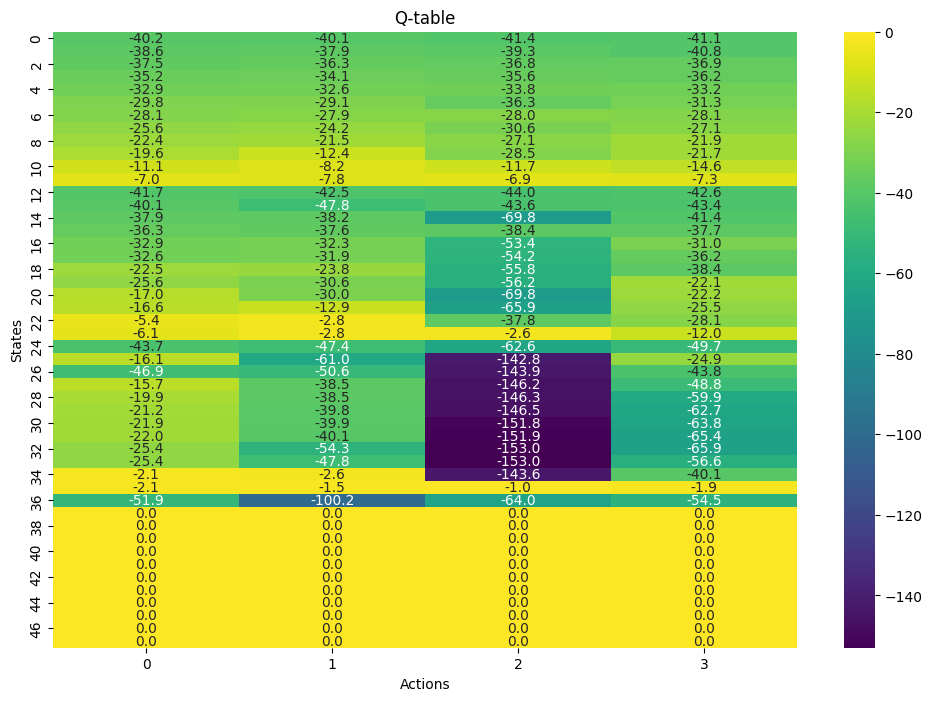

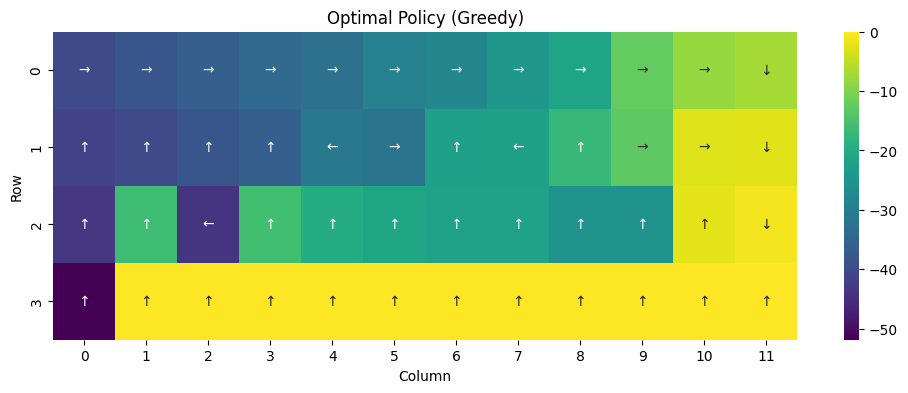

In [14]:
run_env('Greedy')

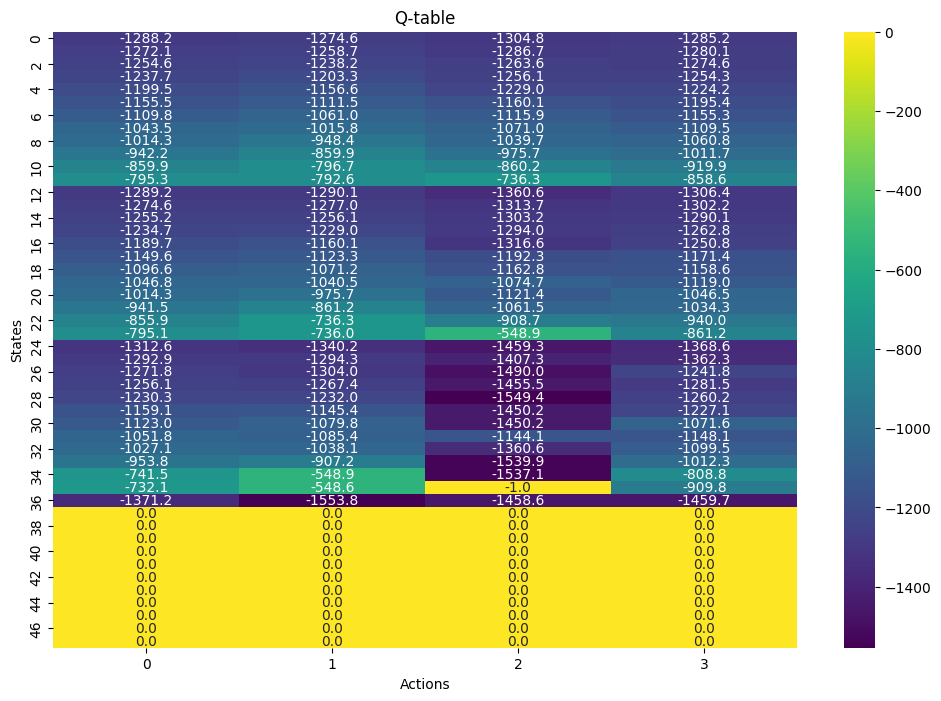

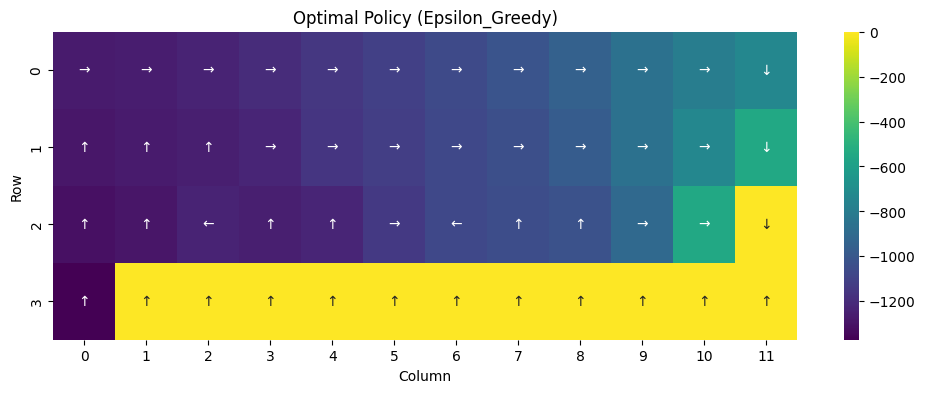

In [15]:
run_env('Epsilon_Greedy')

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

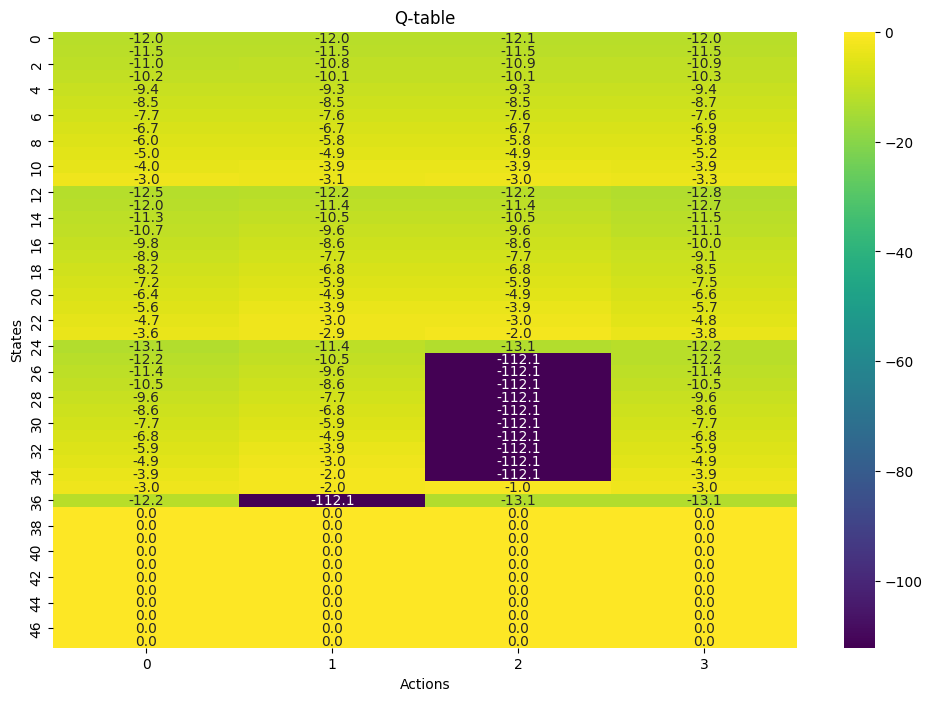

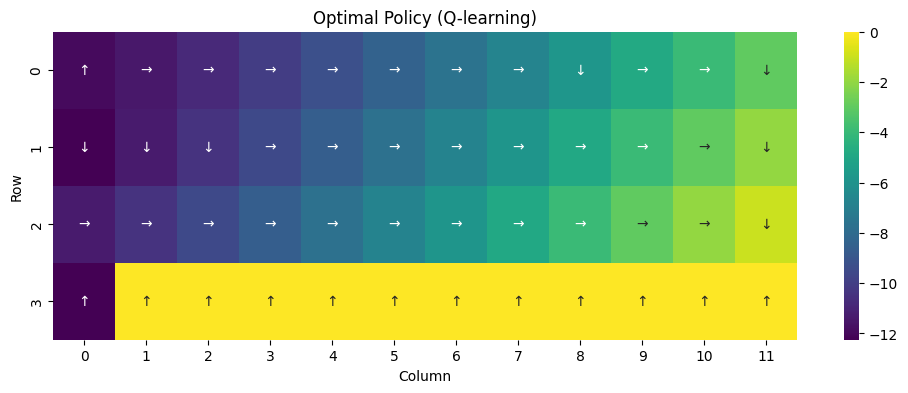

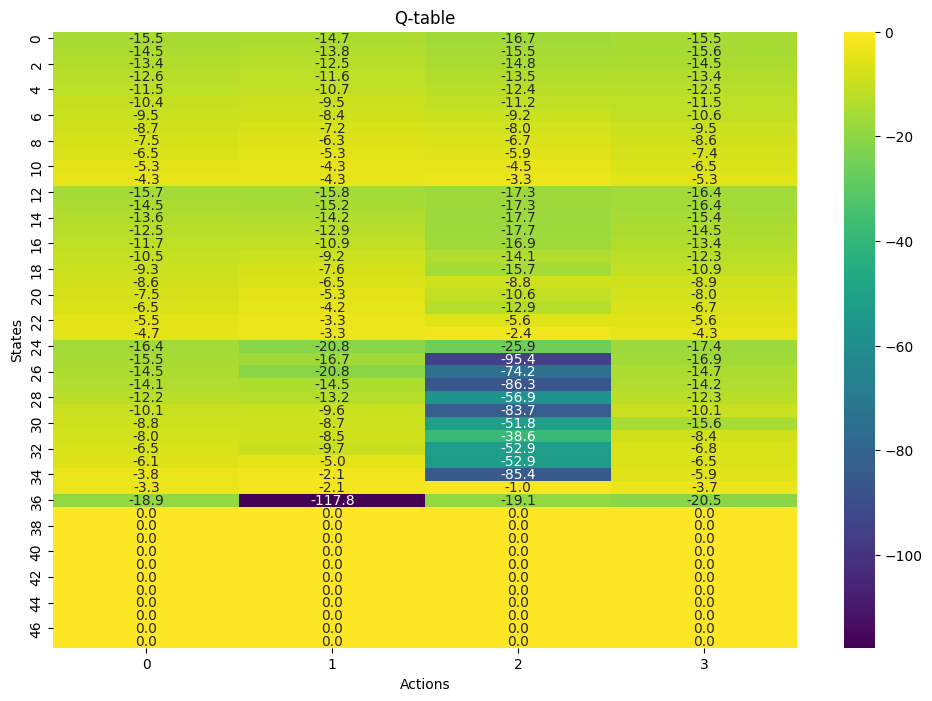

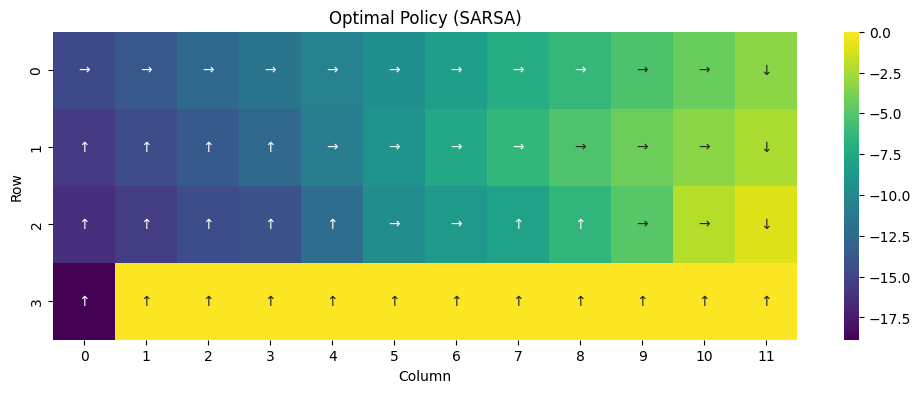

In [18]:
rewards_q = []
rewards_sarsa = []
Q = np.zeros((n_states, n_actions))
def run_env(policy = 'Q-learning'):
  for episode in range(n_episodes):
      state, info = env.reset()
      done = False
      total_reward = 0

      for step in range(max_steps):
          # Random policy: sample an action uniformly
          # action = env.action_space.sample()
          if policy == 'Random':
            action = env.action_space.sample()
          elif policy == 'Greedy':
            action = Greedy_plocy(state, Q)
          elif policy == 'Epsilon_Greedy':
            action = Epsilon_greedy_policy(state, Q)
          elif policy == 'SARSA':
            action = Epsilon_greedy_policy(state, Q)
          elif policy == 'Q-learning':
            action = Epsilon_greedy_policy(state, Q)

          next_state, reward, terminated, truncated, info = env.step(action)
          total_reward += reward
          if policy == 'Q-learning':
            Q_max = np.max(Q[next_state])
            Q[state][action] = Q[state][action] + learning_rate * (reward + discount_factor * Q_max - Q[state][action])
          elif policy == 'SARSA':
            next_action = Epsilon_greedy_policy(next_state, Q)
            Q_next = Q[next_state][next_action]
            Q[state][action] = Q[state][action] + learning_rate * (reward + discount_factor * Q_next - Q[state][action])
          else:
            Q[state][action] = reward + np.mean(Q[next_state])
          state = next_state


          if terminated or truncated:
              break

      # print(f"Episode {episode+1}: total reward = {total_reward}")
      if policy == 'Q-learning':
        rewards_q.append(total_reward)
      elif policy == 'SARSA':
        rewards_sarsa.append(total_reward)

  env.close()
  plot_Q(Q)
  plot_policy(Q, title = policy)

Q = np.zeros((n_states, n_actions))
run_env('Q-learning')
Q_learning_table = np.copy(Q)

Q = np.zeros((n_states, n_actions))
run_env('SARSA')
SARSA_table = np.copy(Q)

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


1. Q-learning: Rewards fluctuate strongly. The reward curve is noisy and does not stabilize well, showing that Q-learning keeps chasing “optimistic” paths but often suffers penalties when slips happen.

SARSA: The reward curve is much smoother and higher, showing more reliable performance.

2. When is_slippery=True, Q-learning assumes the next action is always the best possible, which is too optimistic in a stochastic environment. This causes unstable learning and lower long-term performance.

SARSA (on-policy) updates based on the actual taken action (including exploration and slips), so it learns a safer, more robust strategy.

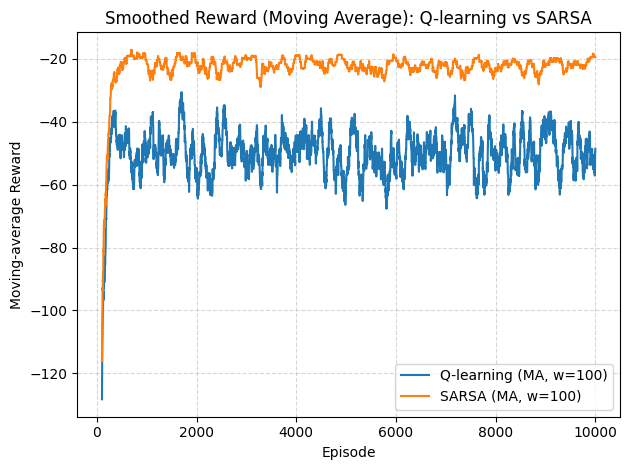

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def moving_average(x, window=100):
    if len(x) == 0:
        return np.array([])
    window = max(1, min(window, len(x)))
    w = np.ones(window) / window
    return np.convolve(x, w, mode='valid')

def plot_per_episode(q, s):
    if len(q) == 0 and len(s) == 0:
        print("Both lists are empty; nothing to plot.")
        return

    n_q, n_s = len(q), len(s)
    x_q = np.arange(1, n_q + 1)
    x_s = np.arange(1, n_s + 1)

    plt.figure()
    if n_q:
        plt.plot(x_q, q, label="Q-learning (per-episode)")
    if n_s:
        plt.plot(x_s, s, label="SARSA (per-episode)")
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("Per-episode Reward: Q-learning vs SARSA")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_moving_average(q, s, window=100):
    mq = moving_average(q, window)
    ms = moving_average(s, window)
    if mq.size == 0 and ms.size == 0:
        print("Both lists are empty after smoothing; nothing to plot.")
        return

    # 平滑后横轴（从 window 开始）
    x_q = np.arange(1, len(q) + 1)[len(q) - len(mq):] if mq.size else np.array([])
    x_s = np.arange(1, len(s) + 1)[len(s) - len(ms):] if ms.size else np.array([])

    plt.figure()
    if mq.size:
        plt.plot(x_q, mq, label=f"Q-learning (MA, w={min(window, len(q))})")
    if ms.size:
        plt.plot(x_s, ms, label=f"SARSA (MA, w={min(window, len(s))})")
    plt.xlabel("Episode")
    plt.ylabel("Moving-average Reward")
    plt.title("Smoothed Reward (Moving Average): Q-learning vs SARSA")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_moving_average(rewards_q, rewards_sarsa, window=100)


# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [21]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

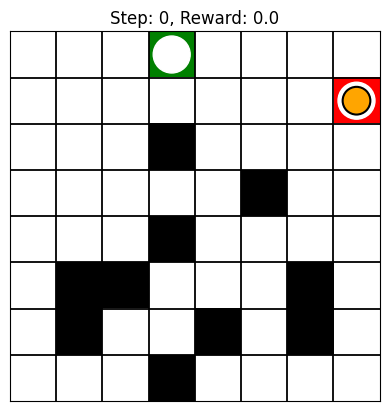

In [ ]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
EPISODES = 100
GAMMA = 0.95
FIRST_VISIT = True
GRID_SIZE = 8
SEED = 1
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=SEED, options=options)
nS = env.observation_space.n
nA = env.action_space.n
Q  = np.zeros((nS, nA), dtype=np.float32)

eps = 0.1

def eps_greedy_action(state, eps):
    if np.random.rand() < eps:
        return env.action_space.sample()
    q = Q[state]
    return np.random.choice(np.flatnonzero(q == q.max()))

rewards_q = []
steps = []
for ep in range(EPISODES):
    state, _ = env.reset(seed=SEED + ep, options=options)
    ep_reward = 0.0

    for t in range(max_steps):
        a = eps_greedy_action(state, eps)
        ns, r, terminated, truncated, _ = env.step(a)
        done = terminated or truncated

        target = r + (0.0 if done else GAMMA * Q[ns].max())
        Q[state, a] += learning_rate * (target - Q[state, a])

        ep_reward += r
        state = ns
        if done:
            break

    rewards_q.append(ep_reward)
    steps.append(t)
    # eps = max(eps_end, eps * eps_decay)

# env.close()

plt.figure()
plt.plot(steps, label="Q-learning (per-episode)")
if len(steps) >= 5:
    ma = moving_average(steps, window=10)
    x  = np.arange(1, len(steps)+1)[len(steps)-len(ma):]
    plt.plot(x, ma, label="Moving Avg (w=100)")
plt.xlabel("Episode"); plt.ylabel("STEPS")
plt.title("Q-learning on SimpleGrid-8x8")
plt.grid(True, linestyle="--", alpha=0.5); plt.legend()
plt.tight_layout(); plt.show()

print(f"min steps: {min(steps)}, average steps: {sum(steps) / len(steps)}")